In [48]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt # 주피터 환경에서 이미지 열어주는거
import statistics

def task1(src_img_path, clean_img_path, dst_img_path):
    """
    This is main function for task 1.
    It takes 3 arguments,
    'src_img_path' is path for source image.
    'clean_img_path' is path for clean image.
    'dst_img_path' is path for output image, where your result image should be saved.

    You should load image in 'src_img_path', and then perform task 1 of your assignment 1,
    and then save your result image to 'dst_img_path'.
    
    find out what is optimal filter and kernel_size for this image
    """
    noisy_img = cv2.imread(src_img_path)
    clean_img = cv2.imread(clean_img_path)
    result_img = None

    # do noise removal
    

    cv2.imwrite(dst_img_path, result_img)
    pass


def apply_average_filter(img, kernel_size): # kernel_size 3 means 3x3 matrix.
    """
    You should implement average filter convolution algorithm in this function.
    It takes 2 arguments,
    
    'img' is source image, and you should perform convolution with average filter.
    
    'kernel_size' is a int value, which determines kernel size of average filter.

    You should return result image.
    """
    
    k = int(kernel_size/2)
    
    # new_img = np.zeros([img.shape[0], img.shape[1], img.shape[2]], dtype='uint8')
    new_img = img.copy()
    
    # add more zeros to each edges
    apply_img = np.zeros([img.shape[0]+2*k, img.shape[1]+2*k, img.shape[2]], dtype='uint8')
    apply_img[k:img.shape[0]+k,k:img.shape[1]+k] = img
    
    # 테두리에 무슨 값 넣지?
    
    
#     for i in range(k,len(img)-k):
#         for j in range(k,len(img[0])-k):
#             t= [0,0,0]
#             for row in range(kernel_size):
#                 for col in range(kernel_size):
#                         t += img[i-k+row,j-k+col] # * mask[row,col]

#             new_img[i, j]= t/(kernel_size*kernel_size)

    for i in range(k, len(apply_img)-k):
         for j in range(k, len(apply_img[0])-k):
            t = [0, 0, 0]
            for row in range(kernel_size):
                for col in range(kernel_size):
                    t += apply_img[i-k+row, j-k+col]  # * mask[row,col]
            
            new_img[i-k, j-k] = t/kernel_size**2
        
    return new_img



def apply_median_filter(img, kernel_size):
    """
    You should implement median filter convolution algorithm in this function.
    It takes 2 arguments,
    'img' is source image, and you should perform convolution with median filter.
    'kernel_size' is a int value, which determines kernel size of median filter.

    You should return result image.
    
    """
    
    k = int(kernel_size/2)
    
    new_img = np.zeros([img.shape[0], img.shape[1], img.shape[2]], dtype='uint8')

    mask = np.ones([3,3], dtype = int)
    mask = mask/9
    
    temp = [] # temp는 한 픽셀당 rgb값의 리스트이다. ex. [143,52,211]
    
    
    def mid_of(color):
        return sorted(color)[int(kernel_size*kernel_size/2)]
    
    
    for i in range(1, len(img)-k):
        for j in range(1, len(img[0])-k):
            red, green, blue = [], [], []
            for row in range(kernel_size):
                for col in range(kernel_size):
                    t = img[i-k+row,j-k+col]
                    red.append(t[0])
                    green.append(t[1])
                    blue.append(t[2])
            
            new_img[i, j] = [mid_of(red),mid_of(green),mid_of(blue)]
            
            ###
    return new_img

def apply_bilateral_filter(img, kernel_size, sigma_s, sigma_r):
    """
    You should implement convolution with additional filter.
    You can use any filters for this function, except average, median filter.
    It takes at least 2 arguments,
    'img' is source image, and you should perform convolution with median filter.
    'kernel_size' is a int value, which determines kernel size of average filter.
    
    'sigma_s' is a int value, which is a sigma value for G_s
    'sigma_r' is a int value, which is a sigma value for G_r

    You can add more arguments for this function if you need.

    You should return result image.
    """
    
    k = int(kernel_size/2)
    
    apply_img = np.zeros([img.shape[0]+2*k, img.shape[1]+2*k, img.shape[2]], dtype='uint8')
    apply_img[k:img.shape[0]+k,k:img.shape[1]+k] = img.copy()
    
    new_img = np.zeros([img.shape[0], img.shape[1], img.shape[2]], dtype='uint8')
    """  커널 적용을 위한 밑작업  """
    
    
    rad = np.linspace(-kernel_size,kernel_size,kernel_size) # 범위가 1) by 2) 사이즈가 된다. 3)칸으로 나눈다.
    a,b = np.meshgrid(rad, rad) 
    
    s_s = sigma_s
    s_r = sigma_r
    
    def gaussian(x, sigma):
        return (1.0 / (2 * math.pi * (sigma ** 2))) * np.exp(- (x ** 2) / (2 * sigma ** 2))
    
#     kernel = (1/(2*math.pi*(s_s**2)))*np.exp(-1*(a**2+b**2)/(2*s_s*s_s)) # 2d 가우시안 커널 생성.
#     kernel = kernel/kernel.sum()
    
#     diff=np.ones([kernel_size, kernel_size, img.shape[2]], dtype='unit8')

    
    for i in range(k, len(img)-k):
        for j in range(k, len(img[0])-k):
            t = [0,0,0]
            for row in range(kernel_size):
                for col in range(kernel_size):
                    
                    diff = img[i-k+row, j-k+col]-img[i-k,j-k] # 차이 구한다.
                    print(diff**2, diff)
                    
                    gr = np.exp(-(diff**2)/(2*(s_r**2))) # [12, 12, 12]
                    
                    # -> kernel 이랑 곱하려면 kernel도 [ㅌ,ㅌ,ㅌ] 가 되어야 한다?
                    
#                     bil_f = gr*kernel # 커널이다.
#                     bil_f = bil_f/bil_f.sum()
                    
#                     for row in range(kernel_size):
#                         for col in range(kernel_size):
#                             t += img[i-k+row, j-k+col]*bil_f[row,col]
                    
            new_img[i, j] = t
            
            ###
    return new_img


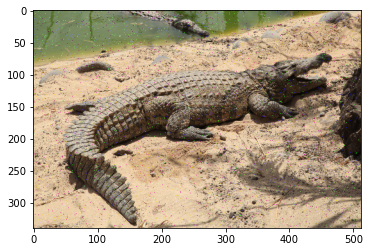

[ 88 255 109]
[ 89 129 108]
[ 88 129 110]
[ 90 128 111]
[ 91 128 111]
[ 90 129 109]
[ 90 128 109]
[ 90 129 108]
[ 90 129 109]
[ 90 129 109]
Done!


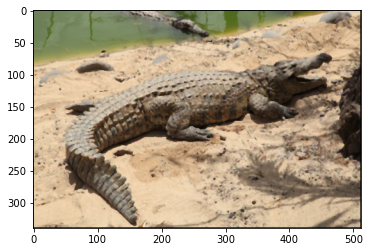

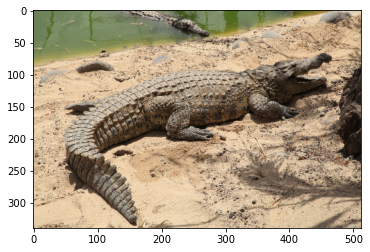

In [164]:
# task1('../inputs/test1.png','../outputs/test1.png','../outputs/test1.png' )
import math

img = cv2.imread('../inputs/test4.png', cv2.IMREAD_COLOR)
img2 = cv2.imread('../inputs/test4_clean.png', cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



result_img = apply_median_filter(img, 3)

print(img[9][9])
print(img[9][10])
print(img[9][11])
print(img[10][9])
print(img[10][10])
print(img[10][11])
print(img[11][9])
print(img[11][10])
print(img[10][11])
print(result_img[10][10])
print("Done!")

plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()




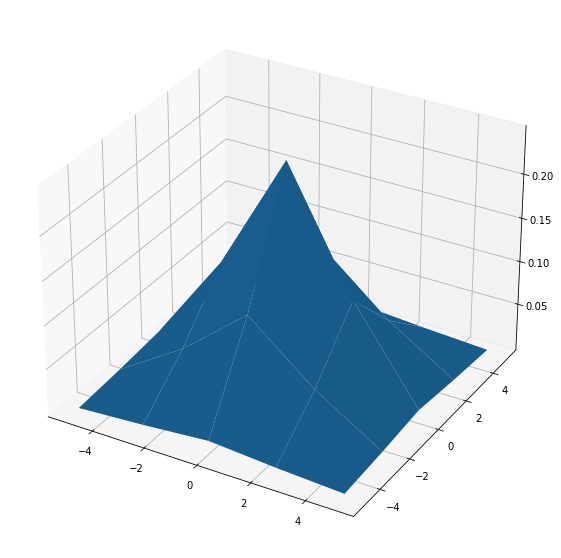

In [15]:
import math
from mpl_toolkits.mplot3d import Axes3D

kernel_size = 5
rad = np.linspace(-kernel_size,kernel_size,kernel_size) # 범위가 1) by 2) 사이즈가 된다. 3)칸으로 나눈다.
a,b = np.meshgrid(rad, rad) 

sigma = 2

# kernel = (1/(2*math.pi*(sigma**2)))*np.exp(-1*(a**2+b**2)/(2*sigma*sigma)) # 가우시안 커널 생성.


# print(kernel/kernel.sum())

# s_r = 2 # sigma for range

# diff = img[i-k+row, j-k+col]-img[i-k,j-k] # 

# print(diff)

# t = np.exp(-(diff**2)/(2*(s_r**2))) # [12, 12, 12]
# # -> kernel 이랑 곱하려면 kernel도 [ㅌ,ㅌ,ㅌ] 가 되어야 한다?
# bil_f = t*kernel


plt.figure(figsize = (10,10))
ax = plt.subplot(1,1,1,projection = '3d')
ax.plot_surface(a,b,kernel)
plt.show()



In [ ]:

aww = np.ones([3,3], dtype=int)

print(aww)

print( aww.sum() )


In [18]:
s_s=2

rad = np.linspace(-kernel_size,kernel_size,kernel_size) # 범위가 1) by 2) 사이즈가 된다. 3)칸으로 나눈다.
a,b = np.meshgrid(rad, rad) 
    
kernel = (1/(2*math.pi*(s_s**2)))*np.exp(-1*(a**2+b**2)/(2*s_s*s_s)) # 2d 가우시안 커널 생성.
kernel = kernel/kernel.sum()

print(kernel)

[[0.00048091 0.00501119 0.01094545 0.00501119 0.00048091]
 [0.00501119 0.0522178  0.11405416 0.0522178  0.00501119]
 [0.01094545 0.11405416 0.2491172  0.11405416 0.01094545]
 [0.00501119 0.0522178  0.11405416 0.0522178  0.00501119]
 [0.00048091 0.00501119 0.01094545 0.00501119 0.00048091]]


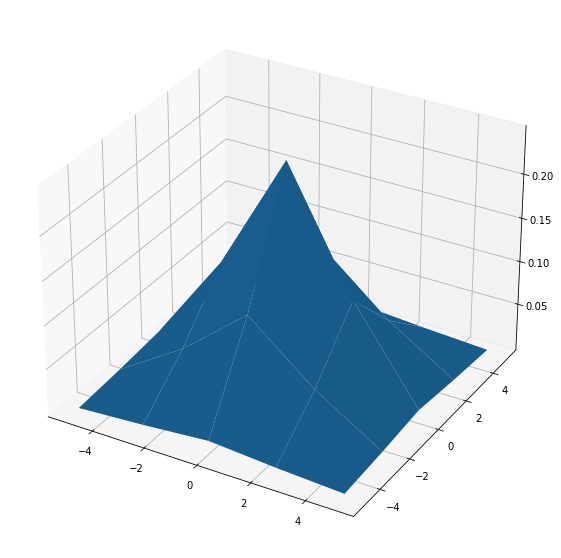

[[1.]]


In [28]:
plt.figure(figsize = (10,10))
ax = plt.subplot(1,1,1,projection = '3d')
ax.plot_surface(a,b,kernel)
plt.show()


In [50]:
gaussian = lambda r2, sigma: (numpy.exp( -0.5*r2/sigma**2 )*3).astype(int)*1.0/3.0
print(gaussian)

<function <lambda> at 0x7fee4808a550>


In [157]:
import math


def distance(x, y, i, j):
    return np.sqrt((x-i)**2 + (y-j)**2)


def gaussian(x, sigma):
    return (1.0 / (2 * math.pi * (sigma ** 2))) * math.exp(- (int(x) ** 2) / (2 * sigma ** 2))


def apply_bilateral_filter(source, filtered_image, x, y, diameter, sigma_i, sigma_s, color):
    hl = int(diameter/2)
    i_filtered = 0
    Wp = 0
    i = 0
    
    a,b,c = source.shape
    
    k = int(diameter/2)
    
    border_add_img = np.zeros([a+2*k, b+2*k, c], dtype='uint8')
    border_add_img[k:a+k,k:b+k] = source.copy()
    
#      sigma_i = int(sigma_i)
    while i < diameter:
        j = 0
        while j < diameter:
            neighbour_x = x - (hl - i)
            neighbour_y = y - (hl - j)
            if neighbour_x >= len(source):
                neighbour_x -= len(source)
            if neighbour_y >= len(source[0]):
                neighbour_y -= len(source[0])
            
            gi = gaussian(source[neighbour_x][neighbour_y][color] - source[x][y][color], sigma_i)
            gs = gaussian(distance(neighbour_x, neighbour_y, x, y), sigma_s)
            w = gi * gs # 최종 bilateral filter 
            i_filtered += source[neighbour_x][neighbour_y][color] * w
            Wp += w
            j += 1
        i += 1
    i_filtered = i_filtered / Wp # normalize?
    filtered_image[x][y][color] = int(round(i_filtered))


def bilateral_filter_own(source, filter_diameter, sigma_i, sigma_s):
    
    filtered_image = source.copy()
    
    k = int(filter_diameter/2)
    i = k
    while i < len(source):
        j = k
        while j < len(source[0]):
            apply_bilateral_filter(source, filtered_image, i, j, filter_diameter, sigma_i, sigma_s, 0)
            apply_bilateral_filter(source, filtered_image, i, j, filter_diameter, sigma_i, sigma_s, 1)
            apply_bilateral_filter(source, filtered_image, i, j, filter_diameter, sigma_i, sigma_s, 2)
            j += 1
        i += 1
    return filtered_image

In [ ]:


def apply_bilateral_filter(img, kernel_size, sigma_s, sigma_r):
    """
    You should implement convolution with additional filter.
    You can use any filters for this function, except average, median filter.
    It takes at least 2 arguments,
    'img' is source image, and you should perform convolution with median filter.
    'kernel_size' is a int value, which determines kernel size of average filter.

    'sigma_s' is a int value, which is a sigma value for G_s
    'sigma_r' is a int value, which is a sigma value for G_r

    You can add more arguments for this function if you need.

    You should return result image.
    """

    #  filtered_image = img.copy()
    filtered_image = np.zeros(img.shape)

    k = int(kernel_size/2)

    for i in range(0, len(img)):
        for j in range(0, len(img[0])):
            Ws0 = 0
            f0 = 0
            Ws1 = 0
            f1 = 0
            Ws2 = 0
            f2 = 0
            for row in range(kernel_size):
                for col in range(kernel_size):
                    n_x = i - k + row
                    n_y = j - k + col
                    if n_x >= len(img):
                        n_x = len(img)-1
                    if n_y >= len(img[0]):
                        n_y = len(img[0])-1
                    if n_x <= 0:
                        n_x = 0
                    if n_y <= 0:
                        n_y = 0

                    gaussian_s = (1.0 / (2 * np.pi * (sigma_s ** 2))**0.5) * \
                        np.exp(- (((n_x-i)**2 + (n_y-j)**2) **
                                  0.5 ** 2) / (2 * sigma_s ** 2))

                    gaussian_r = (1.0 / (2 * np.pi * (sigma_r ** 2))**0.5) * \
                        np.exp(- ((img[n_x][n_y][0] - img[i][j]
                                   [0]) ** 2) / (2 * sigma_r ** 2))
                                   
                    gaussian_r1 = (1.0 / (2 * np.pi * (sigma_r ** 2))**0.5) * \
                        np.exp(- ((img[n_x][n_y][1] - img[i][j]
                                   [1]) ** 2) / (2 * sigma_r ** 2))

                    gaussian_r2 = (1.0 / (2 * np.pi * (sigma_r ** 2))**0.5) * \
                        np.exp(- ((img[n_x][n_y][2] - img[i][j]
                                   [2]) ** 2) / (2 * sigma_r ** 2))

                    w0 = gaussian_s * gaussian_r
                    Ws0 += w0
                    w1 = gaussian_s * gaussian_r1
                    Ws1 += w1
                    w2 = gaussian_s * gaussian_r2
                    Ws2 += w2

                    f0 += img[i][j][0] * w0
                    f1 += img[i][j][1] * w1
                    f2 += img[i][j][2] * w2

            filtered_image[i][j][0] = int(round(f0 / Ws0))
            filtered_image[i][j][1] = int(round(f1 / Ws1))
            filtered_image[i][j][2] = int(round(f2 / Ws2))

    return filtered_image

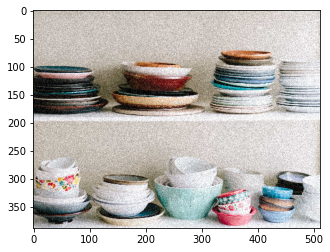

<ipython-input-157-53f8b025e587>:36: RuntimeWarning: overflow encountered in ubyte_scalars
  gi = gaussian(border_add_img[neighbour_x][neighbour_y][color] - border_add_img[x][y][color], sigma_i)


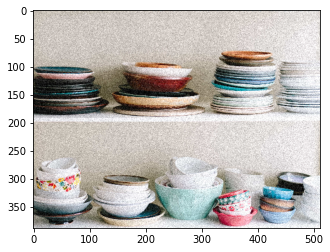

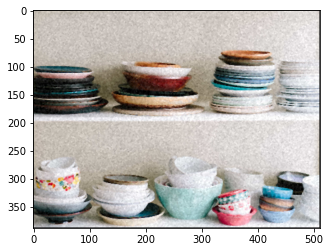

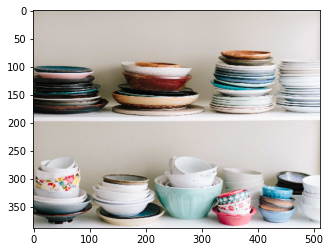

In [165]:
import math

img = cv2.imread('../inputs/test2.png', cv2.IMREAD_COLOR)
img2 = cv2.imread('../inputs/test2_clean.png', cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

result_img1 = bilateral_filter_own(img, 3, 10.0, 40.0)
result_img2 = apply_median_filter(img, 3)

plt.imshow(cv2.cvtColor(result_img1, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(result_img2, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()


In [153]:
import math

img = cv2.imread('../inputs/test2.png', cv2.IMREAD_COLOR)
img2 = cv2.imread('../inputs/test2_clean.png', cv2.IMREAD_COLOR)

a,b,c = img.shape

print(a,b,c)

388 512 3
